<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/MNISTLOSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
!pip install -Uqq fastbook

In [156]:
import fastbook

In [157]:
fastbook.setup_book()

In [158]:
from fastbook import *

In [159]:
from fastai.vision.all import *

In [160]:
path = untar_data(URLs.MNIST_SAMPLE)

In [161]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [162]:
threes = (path/'train'/'3').ls().sorted()

In [163]:
sevens = (path/'train'/'7').ls().sorted()

In [164]:
len(threes)

6131

In [165]:
threes[0]

Path('/root/.fastai/data/mnist_sample/train/3/10.png')

In [166]:
Image_three = Image.open(threes[0])

In [167]:
Image_three

In [168]:
Image_seven = Image.open(sevens[0])

In [169]:
Image_seven

In [170]:
import torch

In [171]:
tensor_three = tensor(Image.open(threes[0]))[4:10,4:22]

In [172]:
tensor_three

tensor([[  0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254, 238,  70,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 104, 244, 254, 224, 254, 254, 254, 141,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 207, 254, 210, 254, 254, 254,  34,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  84, 206, 254, 254, 254, 254,  41,   0,   0,   0]], dtype=torch.uint8)

In [173]:
import numpy as np
import pandas as pd

df = pd.DataFrame(tensor_three)

In [174]:
df.style.set_properties(**{'font - size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0
1,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0
2,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0
3,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0
4,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0
5,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0


In [175]:
tensor_seven= tensor(Image.open(sevens[0]))[8:16, 8:16]

In [176]:
df_seven = pd.DataFrame(tensor_seven)

In [177]:
df_seven

,0,1,2,3,4,5,6,7
0,250,250,250,252,250,250,250,252
1,189,190,250,252,250,250,250,252
2,29,30,49,49,49,49,49,49
3,0,0,0,0,0,0,0,11
4,0,0,0,0,0,0,0,51
5,0,0,0,0,0,0,0,172
6,0,0,0,0,0,0,0,252
7,0,0,0,0,0,31,213,254


In [178]:
#We want to color code our tensor array 
df_seven.style.set_properties(**{'font - size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7
0,250,250,250,252,250,250,250,252
1,189,190,250,252,250,250,250,252
2,29,30,49,49,49,49,49,49
3,0,0,0,0,0,0,0,11
4,0,0,0,0,0,0,0,51
5,0,0,0,0,0,0,0,172
6,0,0,0,0,0,0,0,252
7,0,0,0,0,0,31,213,254


In [179]:
threes_tensor =  [tensor(Image.open(o)) for o in(threes) ]  

In [180]:
seven_tensor = [tensor(Image.open(o)) for o in(sevens)]

In [181]:
!pip install torchvision

In [214]:
stack_threes = torch.stack( threes_tensor).float() /255

In [215]:
stack_sevens = torch.stack(seven_tensor) .float() /255

In [216]:
valid_3_tens = torch.stack(threes_tensor)


In [185]:
valid_3_tens = valid_3_tens

In [217]:
valid_7_tens = torch.stack(seven_tensor)

In [218]:
valid_7_tens = valid_7_tens

In [219]:
train_x = torch.cat([stack_threes, stack_sevens]).view(-1, 28 * 28) 


In [220]:
train_x[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,


In [221]:
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)

In [222]:
dset = list(zip(train_x, train_y))

In [223]:
x,y = dset[0]

In [224]:
x.shape

torch.Size([784])

In [225]:
y.shape

torch.Size([1])

In [226]:
#The validation set
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28 * 28 )

In [227]:
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens))

In [228]:
validDset = list(zip(valid_x, valid_y))

In [229]:
x,y = validDset[0] 

In [230]:
x.shape

torch.Size([784])

In [231]:
def init_params(size, std=1.0):
  return (torch.randn(size) * std).requires_grad_()

In [232]:
weights = init_params((28 * 28,1))

In [233]:
bias = init_params(1)

In [234]:
prediction = (train_x[0]*weights).sum() + bias
#The equation y = wx +b  the w is the weights and the b is the bias the x are the input values or independent variable and y is the predicted value


In [235]:
prediction

tensor([3754.4460], grad_fn=<AddBackward0>)

In [236]:
#Matrix multiplication in python 
def linear1(xb):return xb@weights + bias
#This function is equal to z = wx + bias  or  the sum of the weights w  with dot product of the inputs x plus the bias 

In [239]:
prediction = linear1(train_x)

In [240]:
prediction 

tensor([[ 7.2238],
        [21.8974],
        [ 9.3244],
        ...,
        [ 7.7794],
        [ 8.8263],
        [-1.1484]], grad_fn=<AddBackward0>)

In [ ]:
#The fundamental equation of any neural network us batch * the weight  plus the bias or weighted sum of weights w times the input x plus the bias


In [241]:
#Checking the accuracy of our network 
correct = (prediction>0.0) == train_y

In [242]:
correct

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [ True]])

In [244]:
correct.float().mean().item()

0.514924168586731

In [245]:
targets = tensor([1,0,1])

In [246]:
predictions = tensor([0.9, 0.4, 0.2])

In [249]:
def mnist_loss(targets,predictions):
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [250]:
mnist_loss(targets, predictions)

tensor(0.4333)

In [ ]:
help(torch.where)

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


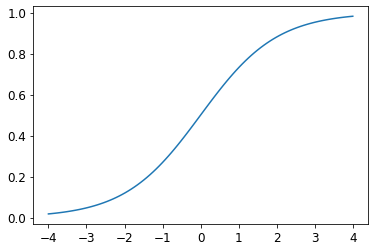

In [252]:
#Sigmoid function always ouputs a number between zero and one 

plot_function(torch.sigmoid, min=-4, max=4)

In [254]:
#Sigmoid function
def sigmoid(x): return (1/ (1+ torch.exp(-x)))

In [257]:
def mnist_loss(targets, predictions):
  predictions = predictions.sigmoid()
  return torch.where(targets ==1, 1 - predictions, predictions).mean()